In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def p(x):
    return 81
def q(x):
    return 81*x**2

In [22]:
def block_diagonal(a, b, c, d):
    n = len(d)
    
    b_ = np.zeros(a.shape)
    c_ = np.zeros(a.shape)
    d_ = np.zeros((n,2,1))

    c_[0] = np.linalg.inv(b[0]).dot(c[0]) 
    d_[0] = np.linalg.inv(b[0]).dot(d[0]) 
    
    for i in range(1,n):
        b_[i] = b[i] - a[i].dot(c_[i-1])
        c_[i] = np.linalg.inv(b_[i]).dot(c[i])
        d_[i] = np.linalg.inv(b_[i]).dot((d[i] - a[i].dot(d_[i-1])))
    
    for i in range(n-2, -1, -1):
        d_[i] = d_[i] - c_[i].dot(d_[i+1])

    return d_

In [23]:
def bvp(l, r, a1, a2, a3, a4, h):
    n = int ((r-l) / (1.0*h))
    a = np.zeros((n-1,2,2))
    b = np.zeros((n-1,2,2))
    c = np.zeros((n-1,2,2))
    d = np.zeros((n-1,2,1))

    for i in range(n-1):
        # As i starts from 0, we define x = l + (i+1)*h
        x = l+(i+1)*h             
        a[i] = np.array(([[1.0 / h**2, 0],[0, 1 / h**2]]))
        b[i] = np.array(([[-2.0 / h**2, -1],[p(x), 1.0 / h**2]]))
        c[i] = np.array(([[1.0 / h**2, 0],[0, 1 / h**2]]))
        d[i] = np.array(([[0],[q(x)]]))
        if i == 0:
            d[i] =  d[i] - a[i].dot(np.array(([[a1], [a3]])))

    d[n-2] = d[n-2] -  c[n-2].dot(np.array(([[a2], [a4]])))
    w = block_diagonal(a, b, c, d)
    w = np.vstack(([np.array(([[a1], [a3]]))], w))
    return np.vstack((w, [npw.array(([[a2], [a4]]))]))

In [24]:
def main():

    a = 0
    b = 1
    a1 =a2 =a3 =a4 =0
    
    h1 = 0.1
    h2 = 0.05
    h3 = 0.02
    
    x1 = np.linspace(a,b,(b - a)/h1 +1)
    w1 = bvp(a, b, a1, a2, a3, a4, h1)
    y1 = w1[[range(w1.shape[0])],[0],[0]]
    y1 = y1[0]
    
    
    x2 = np.linspace(a,b,(b - a)/h2 +1)
    w2 = bvp(a, b, a1, a2, a3, a4, h2)
    y2 = w2[[range(w2.shape[0])],[0],[0]]
    y2 = y2[0]
    
    
    x3 = np.linspace(a,b,(b - a)/h3 +1)
    w3 = bvp(a, b, a1, a2, a3, a4, h3)
    y3 = w3[[range(w3.shape[0])],[0],[0]]
    y3 = y3[0]
    
    
    plt.ylabel('y')
    plt.xlabel('x')
    
    p1, p2, p3 = plt.plot(x3, np.interp(x3, x1, y1), 
                          x3, np.interp(x3, x2, y2), x3, y3)
    
    plt.legend([p1, (p1, p2), (p1,p2,p3)], ["h = 0.1", "h =0.05", "h = 0.005"], loc =4)
   
    plt.show()

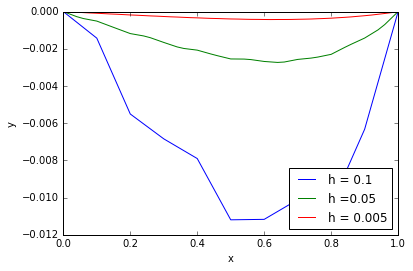

In [25]:
main()

In [31]:
(np.matrix(np.arange(6)).reshape(2,3)) .dot(np.matrix(np.arange(3)).reshape(3,1))

matrix([[ 5],
        [14]])